In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv("real-estate-sales.csv")
df.head

<bound method NDFrame.head of       PropertyID  xrCompositeLandUseID  xrBuildingTypeID     ParcelID  \
0             30                     3               4.0  144-698-048   
1             50                     3               4.0  121-698-073   
2             58                     3               6.0  121-699-090   
3             66                     3               6.0  144-699-037   
4             78                     3               3.0  144-699-025   
...          ...                   ...               ...          ...   
4730       28848                   457               NaN  999-999-349   
4731       28851                   137              23.0  268-293-024   
4732       28857                   457               NaN  999-999-353   
4733       28860                   118               0.0  271-566-100   
4734       28861                   118               0.0  271-566-101   

      LocationStartNumber ApartmentUnitNumber StreetNameAndWay  \
0                    22.0  

In [98]:
df.isna().sum()

PropertyID                    0
xrCompositeLandUseID          0
xrBuildingTypeID             16
ParcelID                      0
LocationStartNumber           1
ApartmentUnitNumber        3261
StreetNameAndWay              0
xrPrimaryNeighborhoodID       0
LandSF                      570
TotalFinishedArea           199
LivingUnits                  16
OwnerLastName                 1
OwnerFirstName             2360
PrimaryGrantor                0
SaleDate                      0
SalePrice                     0
TotalAppraisedValue           0
LegalReference                7
xrSalesValidityID             0
xrDeedID                      0
dtype: int64

In [99]:
df.dtypes

PropertyID                   int64
xrCompositeLandUseID         int64
xrBuildingTypeID           float64
ParcelID                    object
LocationStartNumber        float64
ApartmentUnitNumber         object
StreetNameAndWay            object
xrPrimaryNeighborhoodID      int64
LandSF                     float64
TotalFinishedArea          float64
LivingUnits                float64
OwnerLastName               object
OwnerFirstName              object
PrimaryGrantor              object
SaleDate                    object
SalePrice                    int64
TotalAppraisedValue          int64
LegalReference              object
xrSalesValidityID            int64
xrDeedID                     int64
dtype: object

1. Total Sale per Quarter of the Real Estate

In [100]:
#converting SaleDate to datetime type
df['SaleDate']=pd.to_datetime(df['SaleDate'])
df.dtypes

PropertyID                          int64
xrCompositeLandUseID                int64
xrBuildingTypeID                  float64
ParcelID                           object
LocationStartNumber               float64
ApartmentUnitNumber                object
StreetNameAndWay                   object
xrPrimaryNeighborhoodID             int64
LandSF                            float64
TotalFinishedArea                 float64
LivingUnits                       float64
OwnerLastName                      object
OwnerFirstName                     object
PrimaryGrantor                     object
SaleDate                   datetime64[ns]
SalePrice                           int64
TotalAppraisedValue                 int64
LegalReference                     object
xrSalesValidityID                   int64
xrDeedID                            int64
dtype: object

In [101]:
#getting the quarter and year from the date
df['Year_Quarter'] = df['SaleDate'].dt.to_period('Q')
df['Year_Quarter']

0       2019Q4
1       2019Q4
2       2019Q2
3       2019Q3
4       2020Q2
         ...  
4730    2019Q1
4731    2019Q2
4732    2019Q1
4733    2019Q3
4734    2019Q3
Name: Year_Quarter, Length: 4735, dtype: period[Q-DEC]

In [102]:
total_sales_per_quarter= df.groupby('Year_Quarter')['SalePrice'].sum().reset_index()
total_sales_per_quarter

,Year_Quarter,SalePrice
0,2018Q3,24350918
1,2018Q4,561895007
2,2019Q1,602120437
3,2019Q2,188793377
4,2019Q3,560335327
5,2019Q4,1325446723
6,2020Q1,80792514
7,2020Q2,59089607
8,2020Q3,68483723


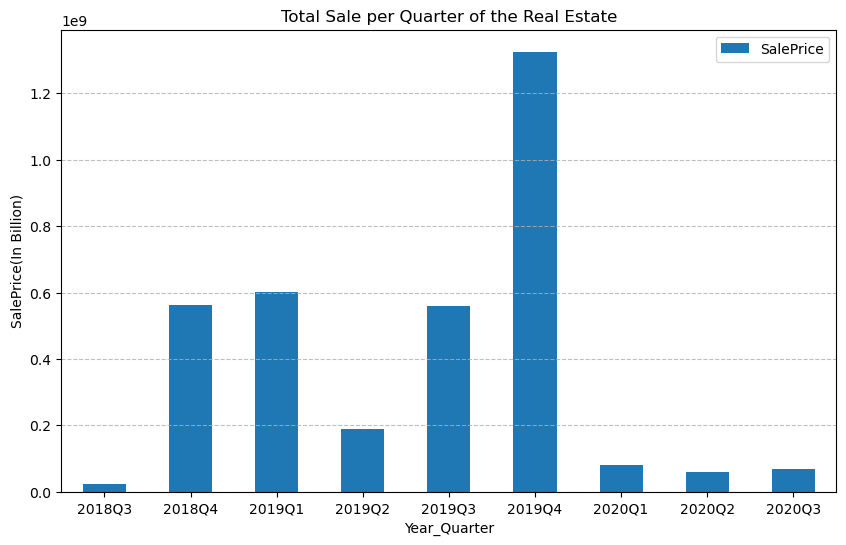

In [103]:
total_sales_per_quarter.plot.bar('Year_Quarter','SalePrice', figsize=(10,6))
plt.title('Total Sale per Quarter of the Real Estate')
plt.xlabel('Year_Quarter')
plt.ylabel('SalePrice(In Billion)')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.xticks(rotation=360)
plt.show()

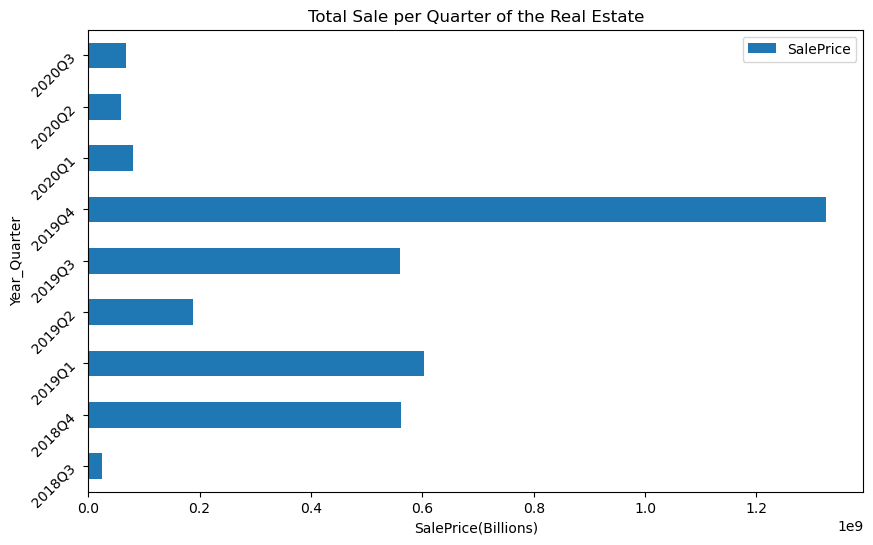

In [104]:
total_sales_per_quarter.plot.barh('Year_Quarter','SalePrice', figsize=(10,6))
plt.title('Total Sale per Quarter of the Real Estate')
plt.ylabel('Year_Quarter')
plt.xlabel('SalePrice(Billions)')

plt.yticks(rotation=45)
plt.show()

Plotting a stacked bar chart for quarterly sales

In [141]:
total_sales_per_quarter['Year_Quarter'] = total_sales_per_quarter['Year_Quarter'].astype(str)

total_sales_per_quarter['Year'] = total_sales_per_quarter['Year_Quarter'].str[:4]
total_sales_per_quarter['Quarter'] = total_sales_per_quarter['Year_Quarter'].str[5:]

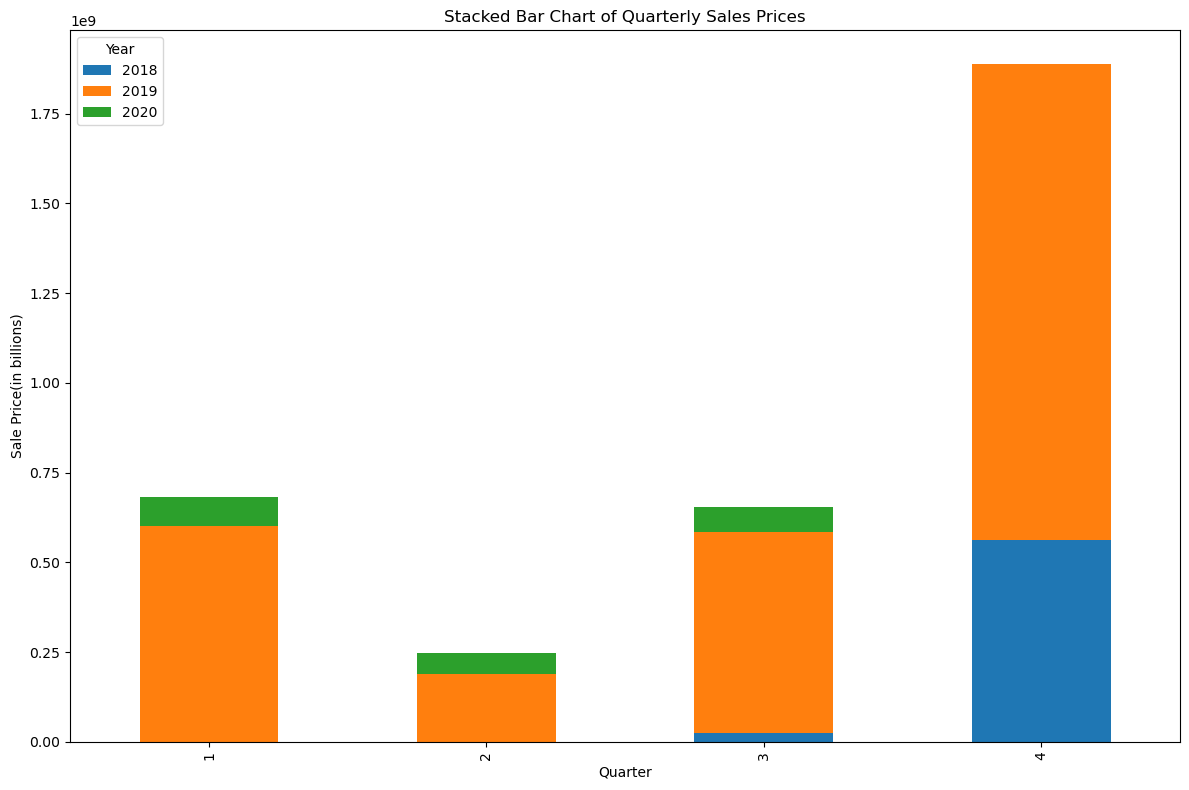

In [147]:
total_sales_per_quarter_pivot = total_sales_per_quarter.pivot(index='Quarter', columns='Year', values='SalePrice')


total_sales_per_quarter_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))


plt.xlabel('Quarter')
plt.ylabel('Sale Price(in billions)')
plt.title('Stacked Bar Chart of Quarterly Sales Prices')
plt.legend(title='Year')

plt.tight_layout()
plt.show()

2. Average Sale price per Area of  the Real Estate

In [105]:
Average_Sale_Price_Per_Area= df.groupby('TotalFinishedArea')['SalePrice'].mean().reset_index()
Average_Sale_Price_Per_Area

,TotalFinishedArea,SalePrice
0,0.00,85000.0
1,215.00,2292453.0
2,235.00,2292453.0
3,257.00,3107547.0
4,266.00,2292453.0
...,...,...
2048,267085.88,6900000.0
2049,277232.00,15750000.0
2050,389735.55,0.0
2051,730457.92,0.0


In [106]:
Average_Sale_Price_Per_Area.columns = ['TotalFinishedArea', 'AverageSalesPrice']
print(Average_Sale_Price_Per_Area)

      TotalFinishedArea  AverageSalesPrice
0                  0.00            85000.0
1                215.00          2292453.0
2                235.00          2292453.0
3                257.00          3107547.0
4                266.00          2292453.0
...                 ...                ...
2048          267085.88          6900000.0
2049          277232.00         15750000.0
2050          389735.55                0.0
2051          730457.92                0.0
2052          983691.59         70500000.0

[2053 rows x 2 columns]


C:\Users\Samue\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Average Sales Price by Total Finished Area')

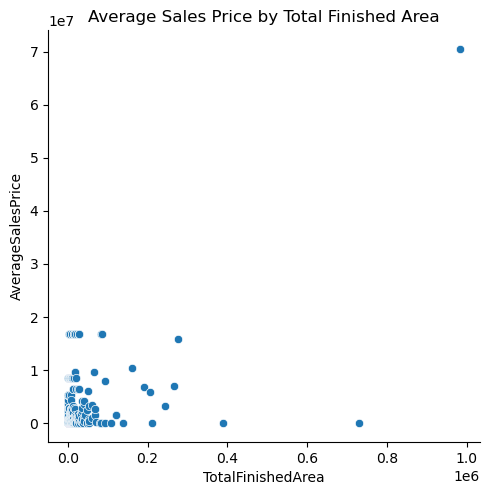

In [154]:
sns.relplot (data=Average_Sale_Price_Per_Area, x="TotalFinishedArea", y="AverageSalesPrice")
plt.title('Average Sales Price by Total Finished Area')

3. Which month has the biggest Sale

In [107]:
#getting a column to show monthly date
df['Year_Month'] = df['SaleDate'].dt.to_period('M')
df['Year_Month']

0       2019-12
1       2019-12
2       2019-05
3       2019-09
4       2020-05
         ...   
4730    2019-01
4731    2019-06
4732    2019-01
4733    2019-08
4734    2019-08
Name: Year_Month, Length: 4735, dtype: period[M]

In [109]:
Monthly_Sales=df.groupby('Year_Month')['SalePrice'].sum().reset_index()
Monthly_Sales

,Year_Month,SalePrice
0,2018-08,3400207
1,2018-09,20950711
2,2018-10,122519616
3,2018-11,36499136
4,2018-12,402876255
5,2019-01,549315095
6,2019-02,30873002
7,2019-03,21932340
8,2019-04,12936501
9,2019-05,159375557


In [110]:
Monthly_Sales.columns = ['Year_Month', 'MonthlySalePrice']
print(Monthly_Sales)

   Year_Month  MonthlySalePrice
0     2018-08           3400207
1     2018-09          20950711
2     2018-10         122519616
3     2018-11          36499136
4     2018-12         402876255
5     2019-01         549315095
6     2019-02          30873002
7     2019-03          21932340
8     2019-04          12936501
9     2019-05         159375557
10    2019-06          16481319
11    2019-07         302585613
12    2019-08          22560947
13    2019-09         235188767
14    2019-10          21178829
15    2019-11          25642175
16    2019-12        1278625719
17    2020-01          39036800
18    2020-02          30904452
19    2020-03          10851262
20    2020-04          12056563
21    2020-05          26728804
22    2020-06          20304240
23    2020-07          26616200
24    2020-08          41867523


In [118]:
# Find the month with the highest sales
best_sales_month = Monthly_Sales.loc[Monthly_Sales['MonthlySalePrice'].idxmax()]

# Display the month with the best sales
print(f"The month with the best sales is {best_sales_month['Year_Month']} with total sales of {best_sales_month['MonthlySalePrice']}.")

The month with the best sales is 2019-12 with total sales of 1278625719.


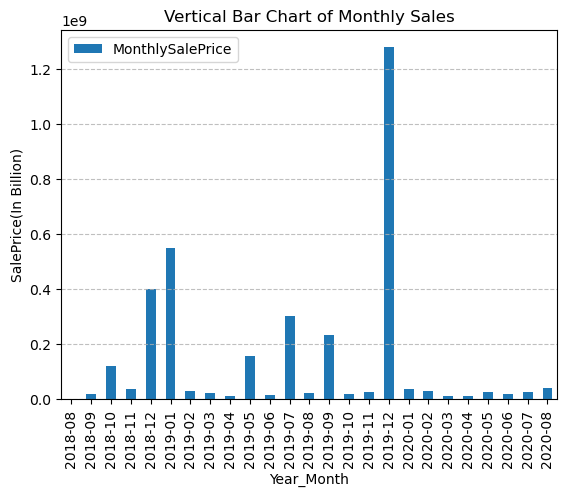

In [121]:
Monthly_Sales.plot.bar('Year_Month','MonthlySalePrice')
plt.title('Vertical Bar Chart of Monthly Sales')
plt.xlabel('Year_Month')
plt.ylabel('SalePrice(In Billion)')
plt.grid(True, axis='y', linestyle='--', alpha=0.8)
plt.show()

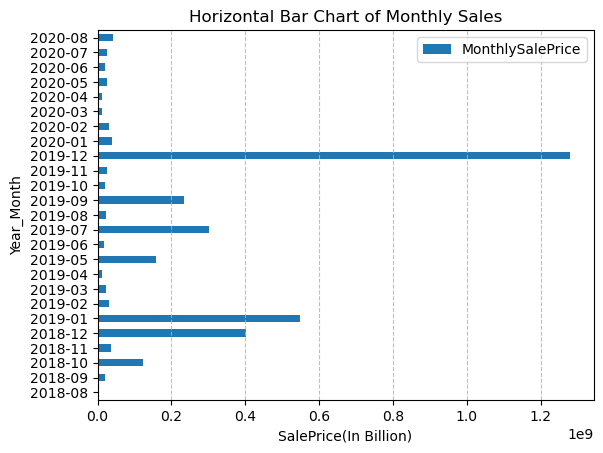

In [120]:
Monthly_Sales.plot.barh('Year_Month','MonthlySalePrice')
plt.title('Horizontal Bar Chart of Monthly Sales')
plt.ylabel('Year_Month')
plt.xlabel('SalePrice(In Billion)')
plt.grid(True, axis='x', linestyle='--', alpha=0.8)
plt.show()

creating a stacked bar chart for Monthly Sales

In [132]:
Monthly_Sales['Year_Month'] = Monthly_Sales['Year_Month'].astype(str)

In [137]:
Monthly_Sales['Year'] = Monthly_Sales['Year_Month'].str[:4]
Monthly_Sales['Month'] = Monthly_Sales['Year_Month'].str[5:]

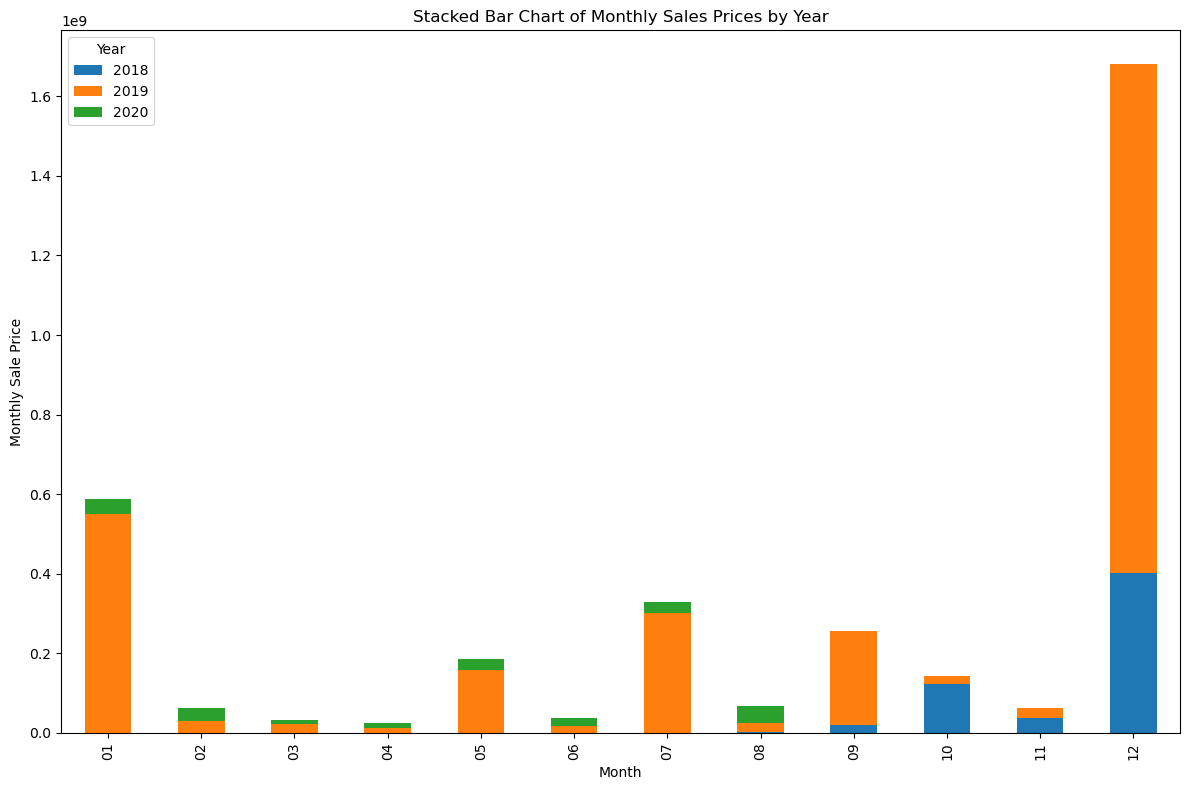

In [140]:
Monthly_Sales_pivot = Monthly_Sales.pivot(index='Month', columns='Year', values='MonthlySalePrice')

# Plotting
Monthly_Sales_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))


plt.xlabel('Month')
plt.ylabel('Monthly Sale Price')
plt.title('Stacked Bar Chart of Monthly Sales Prices by Year')
plt.legend(title='Year')

plt.tight_layout()
plt.show()